# I. Perkenalan 

Nama : Arya Bandoro
Batch 004
Graded Challenge Week 2

# II. Import Pustaka

Disini Dapat kita import pustaka yang dibutuhkan dimana dalam hal ini dengan perintah sebagai berikut ini

In [22]:
from PIL import Image #ini untuk meload image tugasnya
import numpy as np #untuk melakukan penyelesaian persamaan secara numerik
import matplotlib.pyplot as plt #untuk melakukan visualisasi data hasil nanti

# III. Data Loading

Kita dapat memuat gambar untuk pengolahan data dengan perintah sebagai berikut 

In [23]:
#untuk melakukan open gambar kita dapat melakukan perintah sebagai berikut ini
datagambar = Image.open('Graded.JPG')

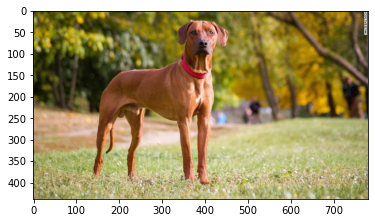

In [24]:
#kita dapat membuka datanya dengan cara sebagai berikut ini
plt.imshow(datagambar)

# IV. Data Preprocessing 

Selanjutnya dapat kita ubah menjadi array data yang diatas sudah kita load dengan perintah sebagai berikut ini

In [25]:
datagambararray = np.array(datagambar) #dapat kita ubah menjadi array dengan perintah berikut

Kita coba cek terlebih dahulu untuk arraynya

In [26]:
datagambararray

array([[[ 86,  93,  39],
        [ 88,  93,  39],
        [ 87,  90,  33],
        ...,
        [ 48,  41,  15],
        [ 46,  39,  10],
        [ 59,  52,  23]],

       [[ 77,  84,  30],
        [ 77,  84,  30],
        [ 78,  83,  25],
        ...,
        [ 46,  39,  13],
        [ 64,  57,  29],
        [ 37,  30,   1]],

       [[ 64,  73,  20],
        [ 66,  73,  19],
        [ 68,  73,  17],
        ...,
        [ 56,  48,  25],
        [ 44,  37,   9],
        [ 70,  60,  33]],

       ...,

       [[165, 151, 106],
        [159, 144, 101],
        [151, 134,  91],
        ...,
        [150, 139,  85],
        [149, 138,  84],
        [145, 134,  80]],

       [[164, 149, 106],
        [157, 142,  99],
        [149, 131,  91],
        ...,
        [155, 143,  93],
        [153, 141,  89],
        [148, 136,  84]],

       [[164, 149, 108],
        [157, 142, 101],
        [146, 131,  90],
        ...,
        [160, 148, 100],
        [157, 145,  97],
        [150, 138,  90]]

In [27]:
#lalu dapat kita cek untuk jumlah kolom dan baris dalam matriks ini dengan cara sebagai berikut ini
datagambar.size

(780, 438)

Sebelum kita melanjutkan kepada fase selanjutnya, kita perlu untuk melakukan pengubahan warna pada gambar dengan cara sebagai berikut ini

In [28]:
datagambargray = datagambar.convert('L')

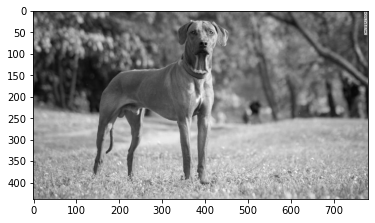

In [36]:
plt.imshow(datagambargray,cmap='gray')

In [37]:
#sama seperti diatas kita dapat mengubah menjadi array dengan perintah dibawah ini
datagambargrayarray = np.array(datagambargray)

In [38]:
#untuk pengecekan dapat menggunakan perintah
datagambargrayarray

array([[ 85,  85,  83, ...,  40,  38,  51],
       [ 76,  76,  75, ...,  38,  56,  29],
       [ 64,  65,  65, ...,  48,  36,  60],
       ...,
       [150, 144, 134, ..., 136, 135, 131],
       [149, 142, 132, ..., 141, 139, 134],
       [149, 142, 131, ..., 146, 143, 136]], dtype=uint8)

In [40]:
datagambargrayarray.shape

(438, 780)

# V. Image Processing

Pertama tama dapat dicari nilai gradient dari array tersebut, sehingga persamaannya akan menjadi sebagai berikut ini

In [41]:
sumbux , sumbuy = np.gradient(datagambargrayarray)

Sehingga akan menjadi sebagai berikut ini

In [42]:
print("Gradien Pada Sumbu X = ",sumbux)

Gradien Pada Sumbu X =  [[ -9.   -9.   -8.  ...  -2.   18.  -22. ]
 [-10.5 -10.   -9.  ...   4.   -1.    4.5]
 [ -9.   -9.   -8.  ... 107.5 -14.   20. ]
 ...
 [ -0.5  -2.   -2.5 ...   2.    1.5   1. ]
 [ -0.5  -1.   -1.5 ...   5.    4.    2.5]
 [  0.    0.   -1.  ...   5.    4.    2. ]]


In [44]:
print("Gradien Pada Sumbu Y = ",sumbuy)

Gradien Pada Sumbu Y =  [[  0.   -1.   -2.5 ...  -1.5   5.5  13. ]
 [  0.   -0.5  -1.  ...   6.   -4.5 -27. ]
 [  1.    0.5   0.5 ...  -3.    6.   24. ]
 ...
 [ -6.   -8.   -9.5 ...   1.   -2.5  -4. ]
 [ -7.   -8.5  -8.5 ...   0.5  -3.5  -5. ]
 [ -7.   -9.   -9.  ...  -0.5  -5.   -7. ]]


Selanjutnya dapat dicari magnitude dari masing masing pixel sehingga akan didapatkan persamaan sebagai berikut ini

In [45]:
magnitude = np.sqrt((sumbux**2) + (sumbuy**2))

In [46]:
#sehingga didapatkan magnitude dari masing masing pixel adalah sebagai berikut ini
magnitude

array([[  9.        ,   9.05538514,   8.38152731, ...,   2.5       ,
         18.82153022,  25.55386468],
       [ 10.5       ,  10.0124922 ,   9.05538514, ...,   7.21110255,
          4.60977223,  27.37243139],
       [  9.05538514,   9.01387819,   8.01560977, ..., 107.54185232,
         15.23154621,  31.2409987 ],
       ...,
       [  6.02079729,   8.24621125,   9.82344135, ...,   2.23606798,
          2.91547595,   4.12310563],
       [  7.01783442,   8.55862138,   8.63133825, ...,   5.02493781,
          5.31507291,   5.59016994],
       [  7.        ,   9.        ,   9.05538514, ...,   5.02493781,
          6.40312424,   7.28010989]])

Selanjutnya untuk melihat treshold

In [52]:
treshold_30 = np.where(magnitude >30 , magnitude,180)
treshold_30

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ..., 107.54185232,
          0.        ,  31.2409987 ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [59]:
treshold_30= np.where(magnitude>30,magnitude,180)

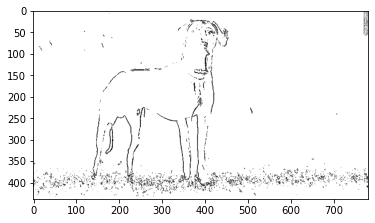

In [60]:
plt.imshow(treshold_30, cmap='gray')

lalu diminta untuk membuat perbandingan sehingga 

In [55]:
def treshold(a):
    trs = np.where(magnitude>a,magnitude,180)
    return plt.imshow(trs, cmap='gray')

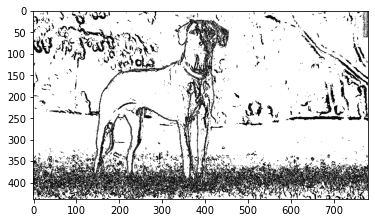

In [56]:
treshold(10)

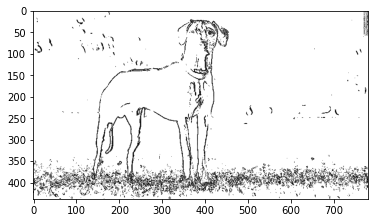

In [57]:
treshold(20)

Selanjutnya untuk mengalikan 2 matriks digunakan persamaan sebagai berikut

In [62]:
datagambargrayarray.shape #diketahui besaran matriksnya adalah sebagai berikut

(438, 780)

Sehingga dapat dibuat matriks random baru dengan cara sebagai berikut

In [63]:
data_pengali = np.random.rand(780,483)

In [64]:
data_pengali

array([[0.54100809, 0.53162189, 0.03675195, ..., 0.77269697, 0.77995561,
        0.2680366 ],
       [0.32336146, 0.74471515, 0.3033168 , ..., 0.26190215, 0.49725055,
        0.21411568],
       [0.62661555, 0.8511991 , 0.13087892, ..., 0.45759688, 0.52648055,
        0.66279432],
       ...,
       [0.31130489, 0.46414037, 0.8021094 , ..., 0.51366198, 0.33613399,
        0.82539525],
       [0.0908882 , 0.00895176, 0.27200307, ..., 0.46656513, 0.39539309,
        0.42850316],
       [0.13622261, 0.85085229, 0.09822988, ..., 0.8025269 , 0.25269529,
        0.73096221]])

In [65]:
data_pengali.shape

(780, 483)

lalu operasi matriksnya adalah sebagai berikut ini

In [66]:
hasil_kali_matriks = np.dot(datagambargrayarray,data_pengali)

In [67]:
hasil_kali_matriks

array([[38792.51187959, 38899.36287566, 38414.98610753, ...,
        38121.11978692, 38475.51308265, 37695.76470694],
       [38632.85156165, 38700.40911489, 38245.01482428, ...,
        37914.11255159, 38279.57207283, 37517.36915647],
       [38468.07529369, 38520.12073265, 38048.10011095, ...,
        37704.93408845, 38058.14925118, 37388.87824178],
       ...,
       [66839.1637035 , 66886.00279326, 66332.92876936, ...,
        65194.95441473, 66045.20504555, 64853.69399165],
       [66903.54580971, 66961.79083533, 66399.67263146, ...,
        65331.26781178, 66054.40328312, 64884.69326054],
       [66844.25658819, 66907.56963797, 66317.0124367 , ...,
        65321.19055667, 65974.94171366, 64832.29831222]])

lalu untuk visualisasi matriks hasil kali nya adalah sebagai berikut ini

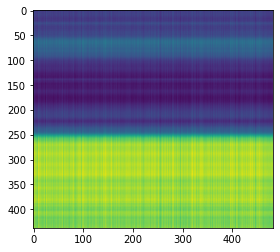

In [70]:
plt.imshow(hasil_kali_matriks)

# VI. Hasil dan Kesimpulan

Didapatkan hasil bahwa semakin besar tresholdnya maka edge yang semakin kecil, dimana semakin kecil tresholdnya maka edge yang terlihat akan semakin tajam, hal ini didapatkan dari bukti bahwa dilakukan perbandingan dengan variabel yang divariasikan adalah tresholdnya, dapat dilihat bahwa semakin kecil treshold yang dijadikan acuan maka edge yang terlihat akan semakin jelas, dan berlaku seterusnya.